In [2]:
from sympy import *
init_printing(use_unicode=True)

In [3]:
def simult(t1=Symbol('t_1'),
           t2=Symbol('t_2'),
           l=Symbol('l'),
           q=Symbol('q'),
           m1=Symbol('m_1'),
           m2=Symbol('m_2'),
           b1=Symbol('b_1'),
           b2=Symbol('b_2')):
    #profits
    pi1 = .5*( (t2-t1)/3.0 +q)*(1+ (1/(3*q))*(t2-t1) )
    pi2 = .5*( (t1-t2)/3.0 +q)*(1+ (1/(3*q))*(t1-t2) )

    #nash bargaining objectives
    v1 = (pi1 - pi1.subs(t1,l) )**b1 * (m1*t1 +m2*t2)**(1-b1)
    v2 = (pi2 - pi2.subs(t2,l) )**b2 * (m1*t1 +m2*t2)**(1-b2)
    
    #simultaneous bargaining
    v1_foc = diff(v1,t1)
    v2_foc = diff(v2,t2)

    #solve for t1 as a function of t2
    t1_param = solve(v1_foc,t1)

    #focus on positive solution
    t1_param = t1_param[-1]

    #substitute back into foc
    v2_foc2 = v2_foc.subs(t1,t1_param)
    t2_param = solve(v2_foc2,t2)
    t2_param = t2_param[-1] 

    #sovle for t1
    t1_param = t1_param.subs(t2, t2_param)

    #solve for pi
    pi1_param = pi1.subs({t1:t1_param, t2:t2_param})
    pi2_param = pi2.subs({t1:t1_param, t2:t2_param})
    
    return (l,q,m1,m2,b1,b2,t1_param,t2_param,pi1_param,pi2_param)
    
simult(l = 1,q = 1, m1 = .5, m2 = .5, b1 = .5,b2 = .5)

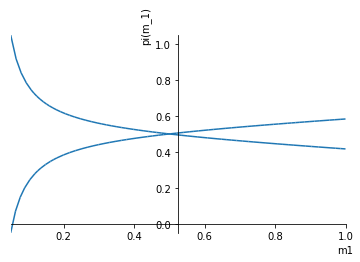

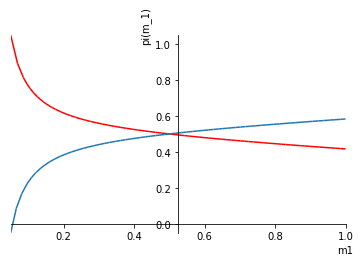

In [5]:
(l,q,m1,m2,b1,b2,t1_param,t2_param,pi1_param,pi2_param) = simult(l = 1,q = 1, m2 = .5, b1 = .5,b2 = .5)
graph1= plot(pi1_param,pi2_param,(m1,.05,1.0),ylabel='pi(m_1)',xlabel='m1')
graph1[0].line_color = 'r'
graph1.save('plots/m1_const_simult.png')

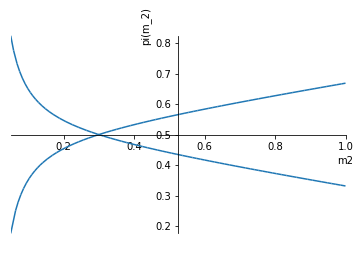

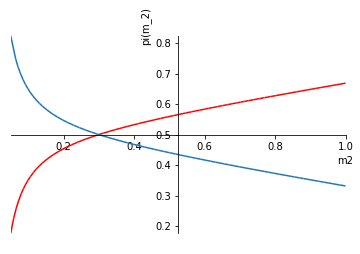

In [6]:
(l,q,m1,m2,b1,b2,t1_param,t2_param,pi1_param,pi2_param) = simult(l = 1,q = 1, m1 = .3, b1 = .5,b2 = .5)
graph2= plot(pi1_param,pi2_param,(m2,.05,1.0),ylabel='pi(m_2)',xlabel='m2')
graph2[0].line_color = 'r'
graph2.save('plots/m2_const_simult.png')

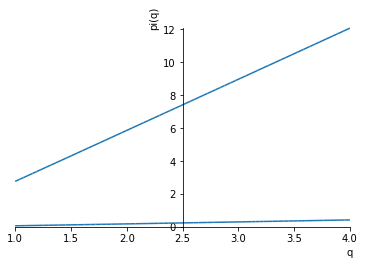

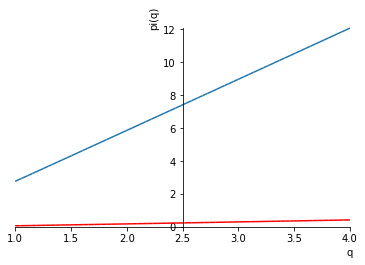

In [7]:
(l,q,m1,m2,b1,b2,t1_param,t2_param,pi1_param,pi2_param) = simult(l = 1, m1 = .5, m2=.5, b1 = .5,b2 = .5)
graph3= plot(pi1_param,pi2_param,(q,1,4),ylabel='pi(q)',xlabel='q')
graph3[0].line_color = 'r'
graph3.save('plots/q_const_simult.png')

In [28]:
#vary m1, write results to file
out = open("simult.csv","w+")
out.write('l,lambda,mu_1,mu_2,beta_1,beta_2,theta_1,theta_2,pi_1,pi_2\n')
for m in range(5,100,5):
    m = m/100.0
    out.write('%s,%s,%s,%s,%s,%s,%s,%s,%s,%s\n'%simult(l = 1,q = 1, m1 = m, m2 = .5, b1 = .5,b2 = .5))
out.close()

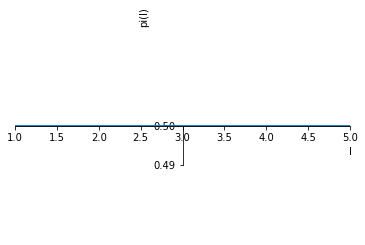

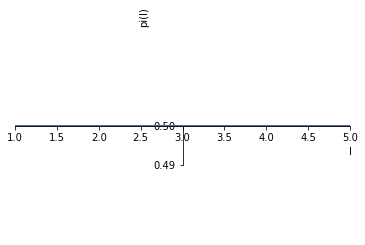

In [8]:
(l,q,m1,m2,b1,b2,t1_param,t2_param,pi1_param,pi2_param) = simult(q = 1, m1 = .5, m2=.5, b1 = .5,b2 = .5)
graph4= plot(pi1_param,pi2_param,(l,1,5),ylabel='pi(l)',xlabel='l')
graph4[0].line_color = 'r'
graph4.save('plots/l_const_simult.png')